## Resampling & Rolling Aggregations

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# Adding "parse_dates=["date"]" formats the "date" column to datetime64
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [4]:
# multi-index dataframe
group by year and then month befor grabbing the sum using ".agg"
# need to add "numeric_only=True" to the .agg due to Futurewarning
retail.groupby([retail["date"].dt.year, retail["date"].dt.month]).agg("sum",numeric_only=True).round(2)

id  store_nbr        sales  onpromotion
date date                                                   
2016 1     109023650109    1519155  23977804.89       119578
     2     104752572111    1421145  21947408.80       183541
     3     114930124749    1519155  23131780.88       181790
     4     114128305830    1470150  25963025.10       215312
     5     120935040633    1519155  24779432.26       370019
     6     119939514750    1470150  22209218.58       285416
     7     126939956517    1519155  23462672.43       264605
     8     129991635081    1519155  22452414.32       271592
     9     128703960990    1470150  22417448.10       296361
     10    135996550965    1519155  24030389.82       370514
     11    134515169910    1470150  24642640.20       438358
     12    137373141510    1470150  29640287.58       517498
2017 1     144954704169    1519155  26328159.94       363428
     2     133549812396    1372140  23250112.37       297254
     3     150762737565    1519155  26704017.69       339291
     4     148805027910    1470150  25895308.49       371042
     5     156767653449    1519155  26911847.25       414646
     6     154616236830    1470150  25682822.12       394582
     7     162772569333    1519155  27011477.57       409128
     8      79856476425     735075  12433322.94       160278

In [6]:
# Resample method withdate index to represent end of each month
# Set the index to date and resample 
retail.set_index("date").resample("M").sum(numeric_only=True).round(2)

,id,store_nbr,sales,onpromotion
date,,,,
2016-01-31,109023650109,1519155,23977804.89,119578
2016-02-29,104752572111,1421145,21947408.80,183541
2016-03-31,114930124749,1519155,23131780.88,181790
2016-04-30,114128305830,1470150,25963025.10,215312
2016-05-31,120935040633,1519155,24779432.26,370019
2016-06-30,119939514750,1470150,22209218.58,285416
2016-07-31,126939956517,1519155,23462672.43,264605
2016-08-31,129991635081,1519155,22452414.32,271592
2016-09-30,128703960990,1470150,22417448.10,296361


### Resampling Assignment
#### there are two ways to get the info...

In [7]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("../retail/oil.csv", 
                  index_col="date", 
                  parse_dates=True)

<Axes: xlabel='date'>

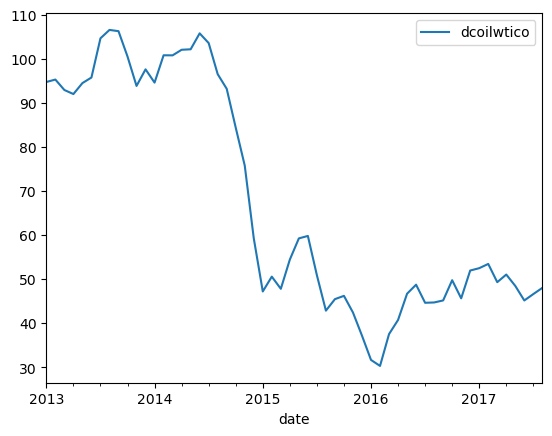

In [9]:
oil.resample("M").mean().plot()

<Axes: xlabel='date'>

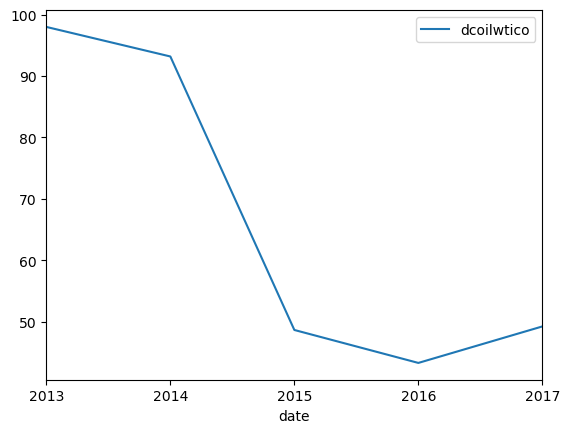

In [8]:
# 1st way is by doing individually
oil.resample("Y").mean().plot()

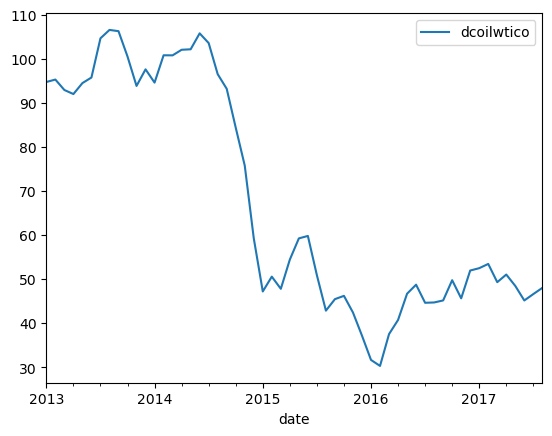

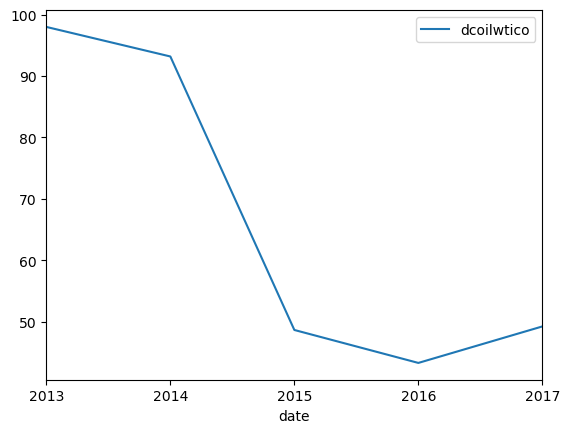

In [12]:
# 2nd way is by for loop!
for period in ["M", "Y"]:
    oil.resample(period).mean().plot()

### Rolling Aggregations

In [14]:
# creating a series
# set date as index
# selecting only the sales column
# resampling by Days ("D")
retail_daily = retail.set_index("date").loc[:, "sales"].resample("D").sum().round(2)

retail_daily

date
2016-01-01      16433.39
2016-01-02    1066677.42
2016-01-03    1226735.72
2016-01-04     955956.88
2016-01-05     835320.44
                 ...    
2017-08-11     826373.72
2017-08-12     792630.54
2017-08-13     865639.68
2017-08-14     760922.41
2017-08-15     762661.94
Freq: D, Name: sales, Length: 593, dtype: float64

<Axes: xlabel='date'>

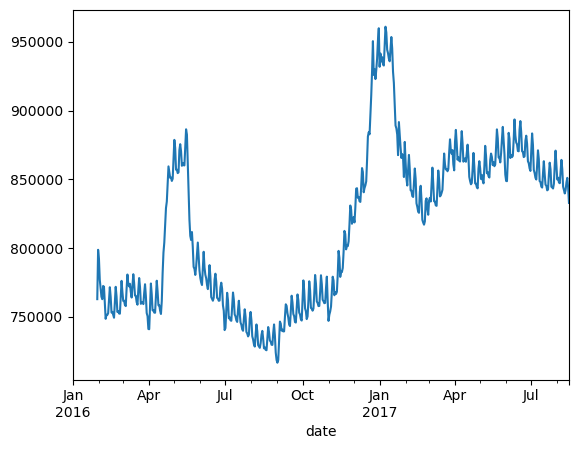

In [16]:
retail_daily.rolling(30).mean().plot()